# Data loading pre processing 

In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# declaring image folder path
data_path = '/content/drive/MyDrive/Colab Notebooks/Osteosercoma/Sorted Dataset'

In [ ]:
 # defining transformation
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root= data_path, transform= transforms)

In [ ]:
print("total samples in dataset: ", len(dataset))

total samples in dataset:  1144


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
num_workers = 0
batch_size = 16

# obtain training indices that will be used for validation
valid_size= 0.2 # taking 20% data as our test set
num_data = len(dataset)
indices = list(range(num_data))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_data))
train_idx, test_idx = indices[split:], indices[:split]

print('After splitting train data: ',len(train_idx))
print('After splitting test data: ',len(test_idx))

# define samplers for obtaining training and test batches
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)
# image classes
classes = ['Non-Tumor', 'Non-Viable-Tumor', 'Viable']

After splitting train data:  916
After splitting test data:  228


In [ ]:
%matplotlib inline

# helper function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

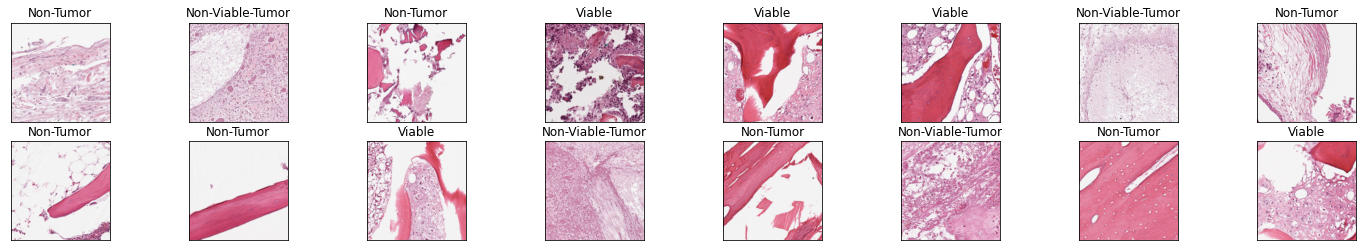

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # Converted Image to numpy

# plot the images in the batch, along with the corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
# Taking Densenet 121 model 
from torchvision import models
densenet_121 = models.densenet121(pretrained= True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet169', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet201', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet161', pretrained=True)

In [ ]:
print(densenet_121)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# # we will freeze all the weights of densnet 121 as we are using pre trained model
# for param in densenet_121.parameters():
#   param.requires_grad = False

In [ ]:
type(densenet_121)

torchvision.models.densenet.DenseNet

In [ ]:
import torch.nn as nn
# now we will modify classifier as we want 1024 features
# densenet_121.classifier = nn.Linear(1024, 1024)

In [ ]:
model = models.densenet121(pretrained=True)
for param in model.parameters():
        param.requires_grad = False

# model.classifier = nn.Sequential(nn.Linear(1024, 256),
#                                     nn.ReLU(),
#                                     nn.Dropout(0.2),
#                                     nn.Linear(256, 10),
#                                     nn.LogSoftmax(dim=1))
model.classifier = nn.Linear(1024, 1024)
x = torch.rand(4, 3, 224, 224)
out = model.forward(x)
print(out.shape)

torch.Size([4, 1024])


In [ ]:
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

# Training Model

# Making Training and test features for ML algorithm

In [ ]:
# feature extraction for training images

x_train = []
y_train = []
model.eval()
for data, target in train_loader:
  # move tensors to GPU if CUDA is available
  if torch.cuda.is_available():
    data, target = data.cuda(), target.cuda()
  output = model(data)
  x_train.append(output)

  if torch.cuda.is_available():
    target = torch.tensor(target, device= 'cpu')
  target = target.numpy()
  target = target.astype(int)
  y_train.append(target)

In [ ]:
# feature extraction for test images 

x_test = []
y_test = []
model.eval()
for data, target in test_loader:
  # move tensors to GPU if CUDA is available
  if torch.cuda.is_available():
    data, target = data.cuda(), target.cuda()
  output = model(data)
  x_test.append(output)

  if torch.cuda.is_available():
    target = torch.tensor(target, device= 'cpu')

  target = target.numpy()
  target = target.astype(int)
  y_test.append(target)

In [ ]:
# As we are getting data from dataloader, so data are inserted as batch size
# that's why we need to convert this into 1D list 
from itertools import chain
x_train_features = list(chain.from_iterable(x_train))
x_test_features = list(chain.from_iterable(x_test))

print("Total training features: ", len(x_train_features))
print("Total test features: ", len(x_test_features))

Total training features:  916
Total test features:  228


In [ ]:
# converting labels into one dimensional list 
y_train = list(chain.from_iterable(y_train))
y_test = list(chain.from_iterable(y_test))

print("Total training labels: ", len(y_train))
print("Total test labels: ", len(y_test))

Total training labels:  916
Total test labels:  228


In [ ]:
for i in range(len(x_train_features)):
  # x_train_features[i] = x_train_features[i].numpy()
  if torch.cuda.is_available():
    x_train_features[i] = x_train_features[i].cpu().detach().numpy()   # if use GPU
  
  x_train_features[i] = x_train_features[i].detach().numpy()   # if use GPU
  
# converting list to numpy array
x_train_features = np.array(x_train_features)
print("Shape of training features: ",x_train_features.shape)

Shape of training features:  (916, 1024)


In [ ]:
for i in range(len(x_test_features)):
  # x_test_features[i] = x_test_features[i].numpy()
  if torch.cuda.is_available():
    x_test_features[i] = x_test_features[i].cpu().detach().numpy()

  x_test_features[i] = x_test_features[i].detach().numpy()

# converting list to numpy array
x_test_features = np.array(x_test_features)
print("Shape of test features: ",x_test_features.shape)

Shape of test features:  (228, 1024)


In [ ]:
#Convert label lists to arrays                
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Shape of training labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)

Shape of training labels:  (916,)
Shape of test labels:  (228,)


# Random Forest

In [ ]:
# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 64, criterion = 'entropy', random_state = 42)
rf_classifier.fit(x_train_features, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=64, random_state=42)

In [ ]:
# prediciting on test data
rf_pred = rf_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, rf_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.917


**ROC-AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.983


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, rf_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.869


**confusion matrix**

In [ ]:
# Function to plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize= False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
        title = "Normalized Confusion Matrix"
    else:
        # print('Confusion matrix, without normalization')
        title = "Confusion Matrix"

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

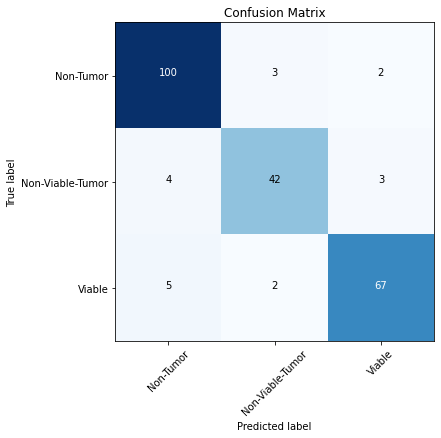

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

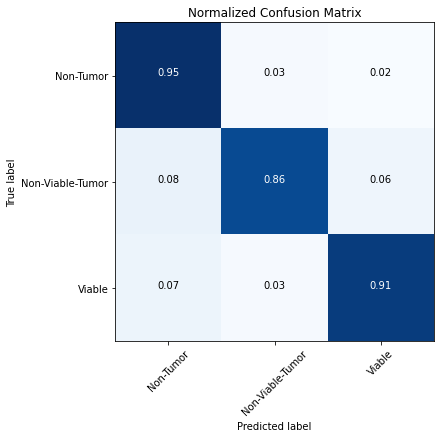

In [ ]:
# plotting confusion matrix with normalization
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       105
           1       0.89      0.86      0.88        49
           2       0.93      0.91      0.92        74

    accuracy                           0.92       228
   macro avg       0.91      0.90      0.91       228
weighted avg       0.92      0.92      0.92       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
# function to measure TP, FP, TN, FN

def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, rf_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.917     	      0.909      	   0.924   
  1   Non-Viable-Tumor     0.894     	       0.75      	   0.971   
  2        Viable          0.931      	      0.827      	   0.966   


# XGBOOST

In [ ]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train_features, y_train) #For sklearn no one hot encoding

XGBClassifier(objective='multi:softprob')

In [ ]:
#Now predict using the trained RF model. 
prediction = model.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, prediction)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.921


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

# clf = xgb.XGBClassifier().fit(x_train_features, y_train)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.983


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.876


**Confusion Matrix**

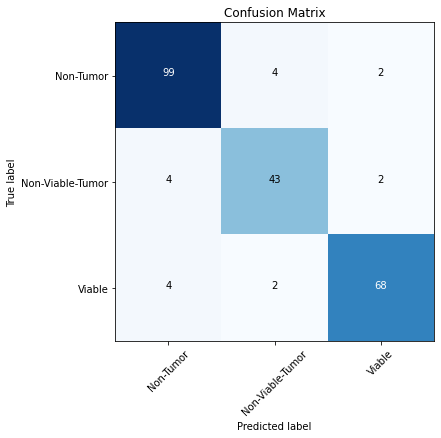

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

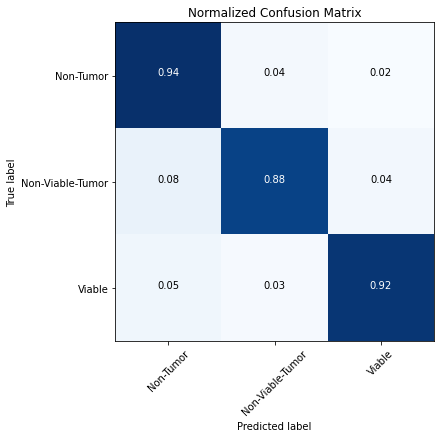

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.88      0.88      0.88        49
           2       0.94      0.92      0.93        74

    accuracy                           0.92       228
   macro avg       0.92      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228



**calculating precision, recall(sensitivity), specificity by formula**:

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, prediction)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.925     	      0.908      	   0.933   
  1   Non-Viable-Tumor     0.878     	      0.782      	   0.965   
  2        Viable          0.944      	      0.829      	   0.973   


# Light Gradient Boosting (LGBM)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# fit the model on the whole dataset
lgbm_model = LGBMClassifier()

# fit our training data into lgbm classifier
lgbm_model.fit(x_train_features, y_train)

LGBMClassifier()

In [ ]:
# predicting test features using LGBM classifier
lgbm_pred = lgbm_model.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, lgbm_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.921


**ROC-AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, lgbm_model.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.983


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, lgbm_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.876


**confusion matrix**

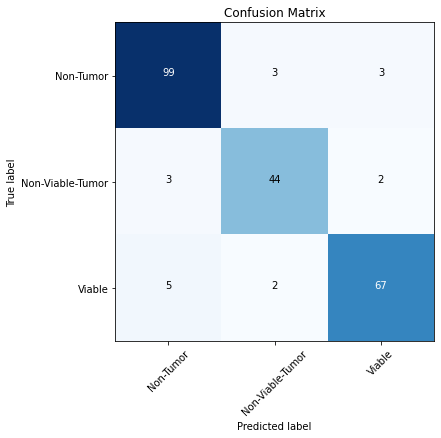

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

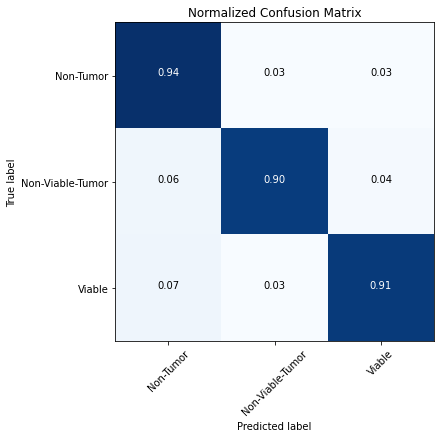

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classsification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.90      0.90      0.90        49
           2       0.93      0.91      0.92        74

    accuracy                           0.92       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.92      0.92      0.92       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, lgbm_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.925     	      0.908      	   0.933   
  1   Non-Viable-Tumor     0.898     	      0.772      	   0.971   
  2        Viable          0.931      	      0.838      	   0.966   


# Support Vector Machine (SVM)

In [ ]:
# importing SVM module
from sklearn.svm import SVC

In [ ]:
# kernel to be set radial bf 
svm_classifier = SVC(kernel='linear', probability= True)

# fit our training data into svm classifier
svm_classifier.fit(x_train_features, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# predicting test data 
svm_pred = svm_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, svm_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.904


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

# svm_c = SVC(kernel='linear', probability= True).fit(x_train_features, y_train)

roc_auc = roc_auc_score(y_test, svm_c.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.981


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, svm_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.848


**Confusion Matrix**

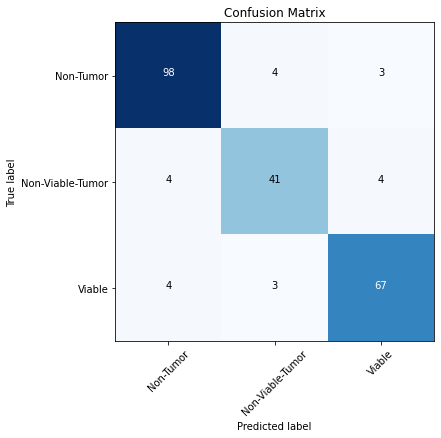

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

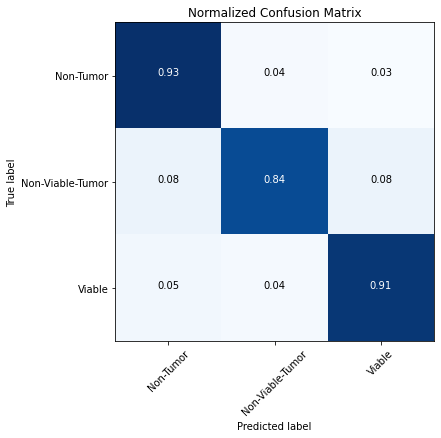

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       105
           1       0.85      0.84      0.85        49
           2       0.91      0.91      0.91        74

    accuracy                           0.90       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.90      0.90      0.90       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, svm_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.925     	      0.875      	   0.931   
  1   Non-Viable-Tumor     0.854     	      0.732      	   0.959   
  2        Viable          0.905      	      0.817      	   0.952   


# Multi Linear Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# defining MLP classifier
mlp_classifier = MLPClassifier(random_state=1, max_iter=200)

# fitting training data 
mlp_classifier.fit(x_train_features, y_train)

MLPClassifier(random_state=1)

In [ ]:
# predicting through test data
mlp_pred = mlp_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, mlp_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.934


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, mlp_classifier.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.985


**Matthews correlation coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, mlp_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.897


**confusion matrix**

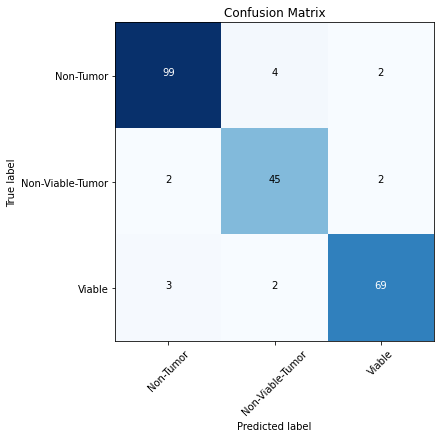

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, mlp_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

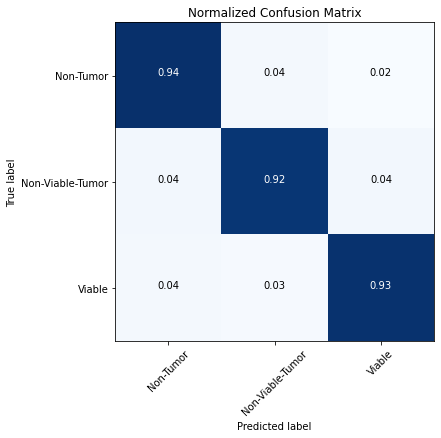

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.88      0.92      0.90        49
           2       0.95      0.93      0.94        74

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, mlp_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.952     	      0.908      	   0.958   
  1   Non-Viable-Tumor     0.882     	      0.833      	   0.966   
  2        Viable          0.945      	      0.862      	   0.973   
